In [1]:
import logging
import numpy as np
import pandas as pd
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
%matplotlib inline

In [2]:
from rasterio.transform import Affine
import rasterio

In [3]:
from iSDM.environment import RasterEnvironmentalLayer
biomes_adf = RasterEnvironmentalLayer(file_path="/home/daniela/git/iSDM/data/rebioms/w001001.adf")

In [4]:
raster_biomes_reader = biomes_adf.load_data()

Loaded raster data from /home/daniela/git/iSDM/data/rebioms/w001001.adf 
Driver name: AIG 
Metadata: {'affine': Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0),
 'count': 1,
 'crs': {'init': 'epsg:4326'},
 'driver': 'AIG',
 'dtype': 'uint8',
 'height': 360,
 'nodata': 255.0,
 'transform': (-180.0, 0.5, 0.0, 90.0, 0.0, -0.5),
 'width': 720} 
Resolution: x_res=720 y_res=360.
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0) 
Coordinate reference system: {'init': 'epsg:4326'} 
Affine transformation: (-180.0, 0.5, 0.0, 90.0, 0.0, -0.5) 
Number of layers: 1 
Dataset loaded. Use .read() or .read_masks() to access the layers.


In [5]:
raster_data = raster_biomes_reader.read(1)

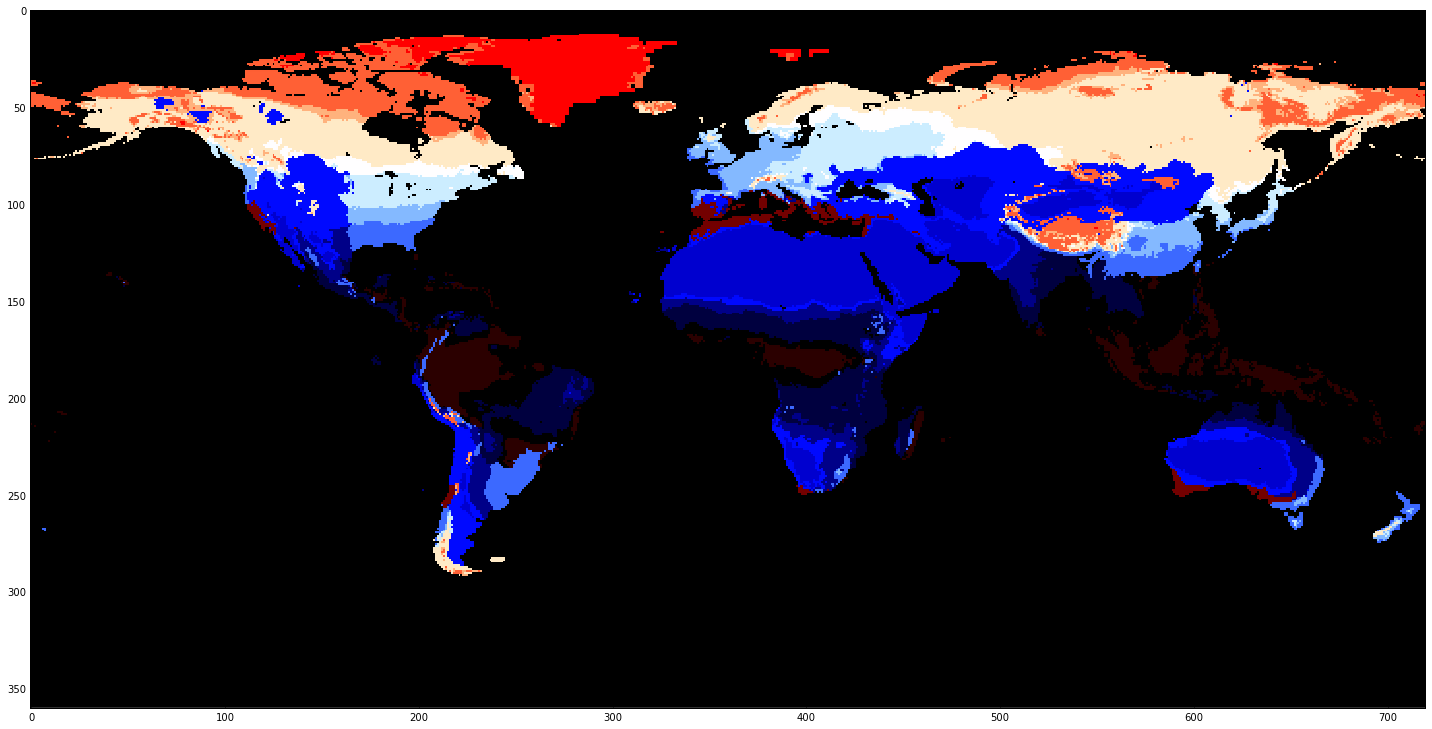

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.imshow(raster_data, cmap="flag", interpolation="none")

In [7]:
raster_data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
raster_data.shape

(360, 720)

In [9]:
np.unique(raster_data) # what are the unique values here

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21, 255], dtype=uint8)

In [10]:
raster_biomes_reader.nodata

255.0

In [11]:
biomes_polygones_df = biomes_adf.polygonize()

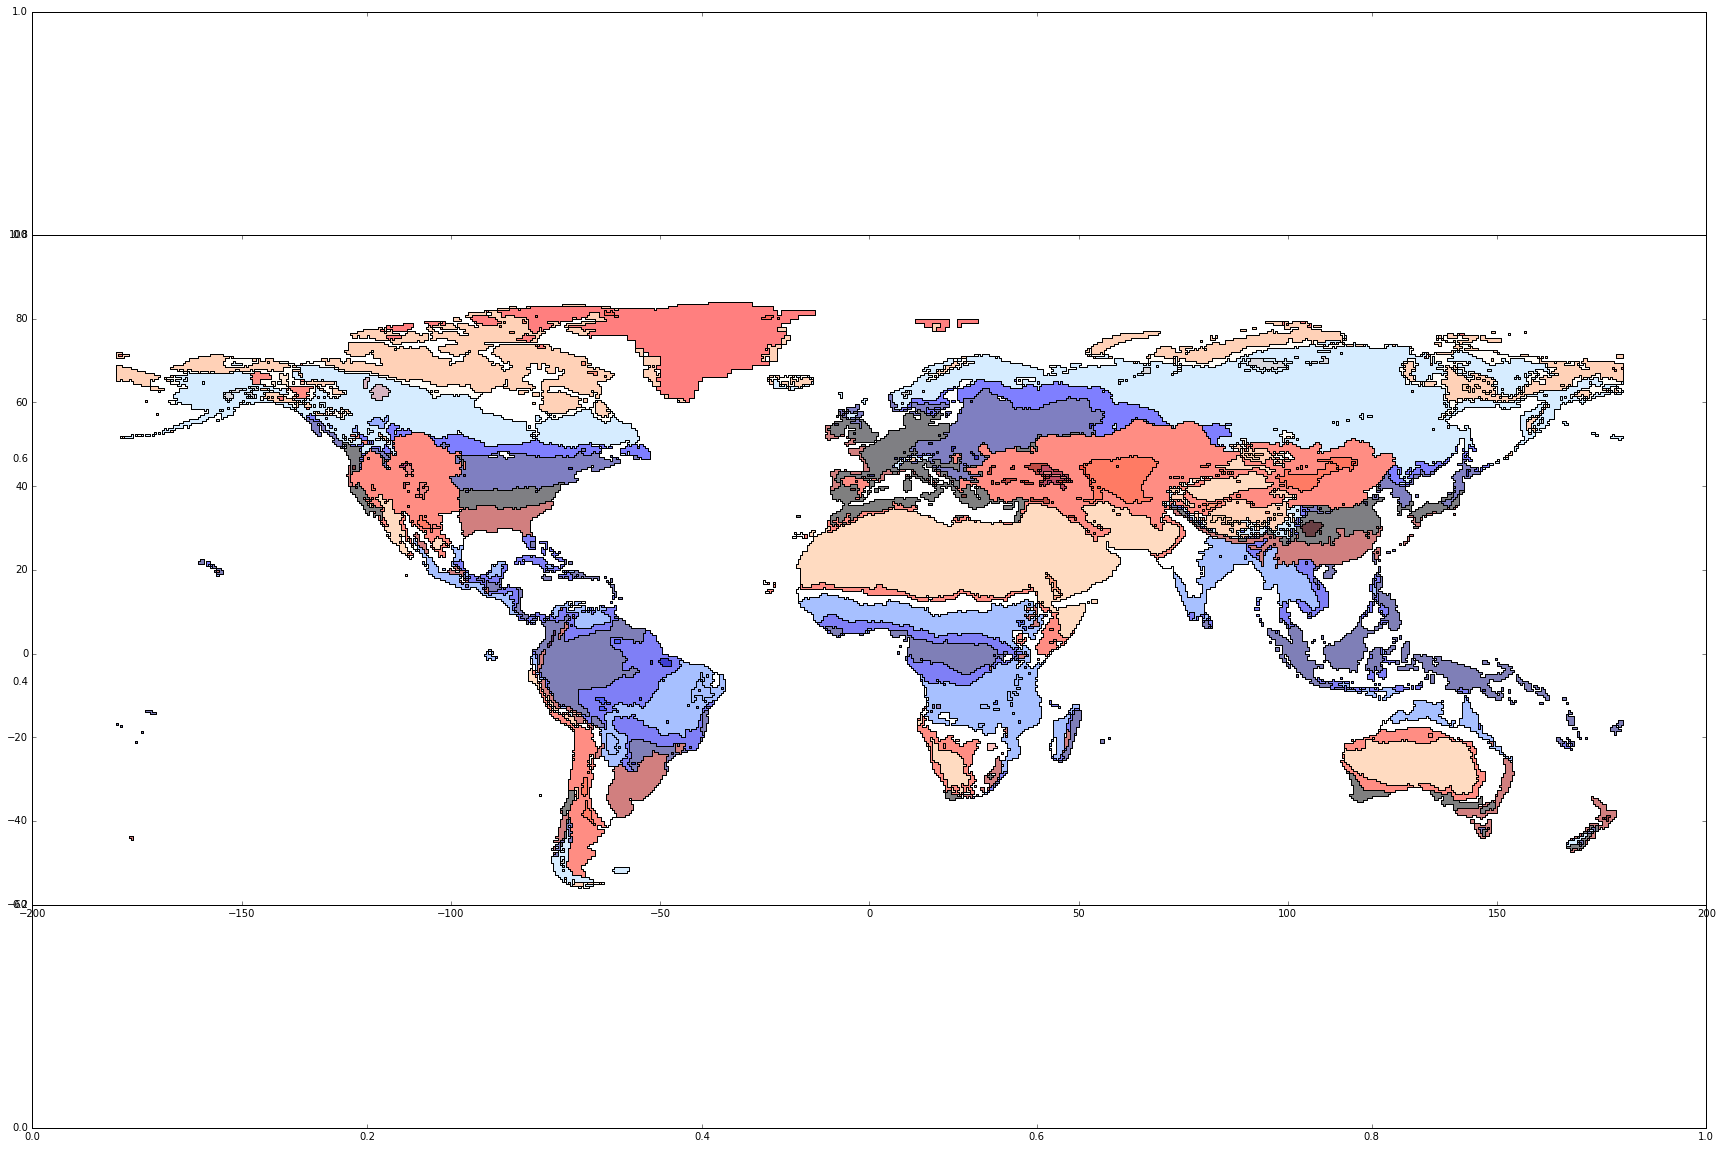

In [14]:
fig, ax = plt.subplots(1,1, figsize=(30,20))
biomes_polygones_df.plot(column="value", colormap="flag")

In [19]:
biomes_polygones_df.value.unique()

array([  8.,   7.,   9.,  10.,  15.,  11.,  12.,  13.,  14.,  16.,  21.,
        17.,  19.,  18.,  20.])